#**Hotel Booking Project**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("hotel_booking.csv")

#**Basic Statics**

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0.0,0.0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0.0,0.0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0.0,0.0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0.0,0.0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0.0,1.0,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [ ]:
df.shape

(94665, 36)

In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94665 entries, 0 to 94664
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           94665 non-null  object 
 1   is_canceled                     94665 non-null  int64  
 2   lead_time                       94665 non-null  int64  
 3   arrival_date_year               94665 non-null  int64  
 4   arrival_date_month              94665 non-null  object 
 5   arrival_date_week_number        94665 non-null  int64  
 6   arrival_date_day_of_month       94665 non-null  int64  
 7   stays_in_weekend_nights         94665 non-null  int64  
 8   stays_in_week_nights            94665 non-null  int64  
 9   adults                          94665 non-null  int64  
 10  children                        94661 non-null  float64
 11  babies                          94665 non-null  int64  
 12  meal                            

#**Handling Missing Value**

In [ ]:
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [ ]:
df['children'].fillna(0,inplace=True)

<ipython-input-77-833de8cbfd38>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['children'].fillna(0,inplace=True)


In [ ]:
df.drop(['agent', 'company'], axis=1, inplace=True)

In [ ]:
# Group by related features and find the most frequent country
country_map = df.groupby(['market_segment', 'distribution_channel'])['country'].apply(lambda x: x.mode()[0] if not x.mode().empty else 'Unknown')

# Define a function to fill missing countries based on related columns
def fill_missing_country(row):
    if pd.isnull(row['country']):
        return country_map.get((row['market_segment'], row['distribution_channel']), 'Unknown')
    return row['country']

# Apply the function to replace missing values in 'country'
df['country'] = df.apply(fill_missing_country, axis=1)

In [ ]:
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(94665, 34)

**Sensitive Data(drop columns)**

In [ ]:
df.drop(['name', 'email', 'phone-number', 'credit_card'], axis=1, inplace=True)

In [ ]:
df['meal'] =df['meal'].str.strip().str.upper()


#**Date and Time Handling**

**Convert reservation_status_date to a datetime format**

In [ ]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])


Extract useful features from the date:

###**Day of the week**

In [ ]:
df['day_of_week'] = df['reservation_status_date'].dt.day_name()


###**Year and Month**

In [ ]:
df['year'] =df['reservation_status_date'].dt.year
df['month'] = df['reservation_status_date'].dt.month


In [ ]:
df.shape

(94665, 33)

#**Check Invalid Data**

**Rows where adults, children, and babies sum to zero likely indicate invalid bookings:**

In [ ]:
invalid_bookings =df[(df['adults']+df['children'] + df['babies']) == 0]
print(invalid_bookings.shape)


(86, 33)


**Remove these rows**

In [ ]:
df = df[(df['adults']+df['children'] + df['babies']) > 0]


In [ ]:
df.shape

(94579, 33)

#**Scaling and Normalization**

###**Scale Continuous Variables**

**For numerical columns like lead_time and adr, apply standardization**

##**Check for Remaining Issues**

In [ ]:
print(df.isnull().sum())


hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              1
country                           0
market_segment                    1
distribution_channel              1
is_repeated_guest                 1
previous_cancellations            1
previous_bookings_not_canceled    1
reserved_room_type                1
assigned_room_type                1
booking_changes                   1
deposit_type                      1
days_in_waiting_list              1
customer_type                     1
adr                               1
required_car_parking_spaces       1
total_of_special_requests   

In [ ]:
df.dtypes

,0
hotel,object
is_canceled,int64
lead_time,int64
arrival_date_year,int64
arrival_date_month,object
arrival_date_week_number,int64
arrival_date_day_of_month,int64
stays_in_weekend_nights,int64
stays_in_week_nights,int64
adults,int64


In [ ]:
df.to_csv('cleaned_hotel_booking_data.csv', index=False)

#**Distribution of Bookings by Hotel Type**

<ipython-input-95-63f0a966b647>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=hotel_counts.index, y=hotel_counts.values, palette='viridis',width=0.4)


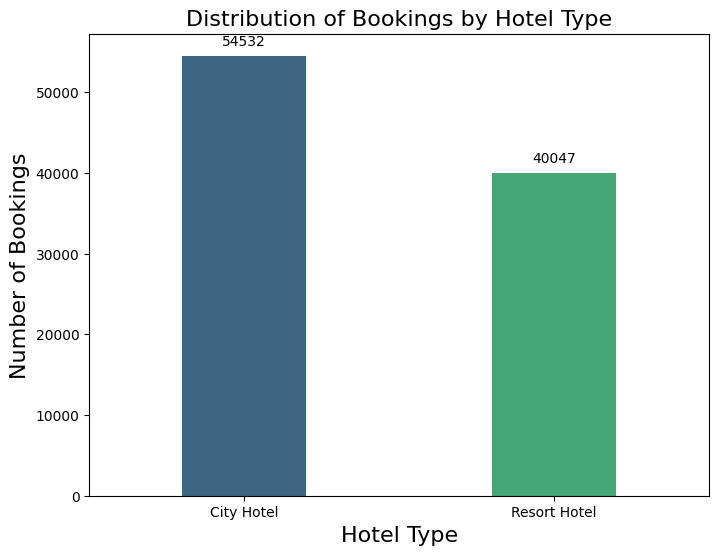

In [ ]:
hotel_counts = df['hotel'].value_counts()
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=hotel_counts.index, y=hotel_counts.values, palette='viridis',width=0.4)
plt.title('Distribution of Bookings by Hotel Type', fontsize=16)
plt.xlabel('Hotel Type', fontsize=16)
plt.ylabel('Number of Bookings', fontsize=16)

# Add value labels to the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

plt.show()

In [ ]:
df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

#**Booking Trends by Year**

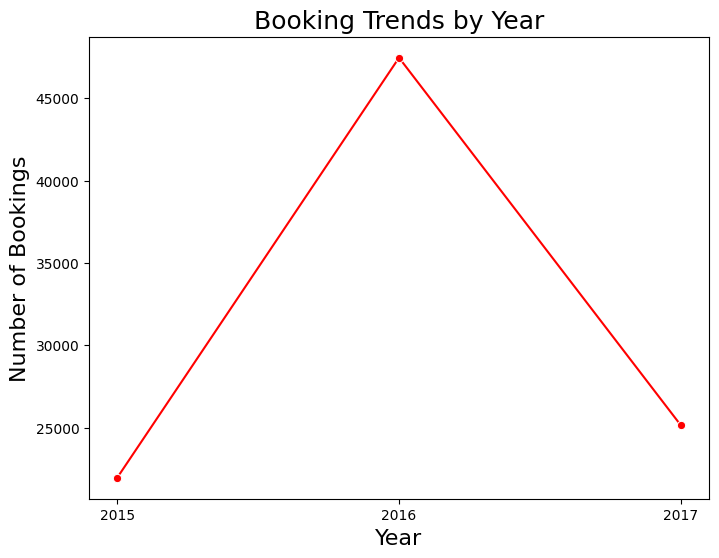

In [ ]:
yearly_counts = df['arrival_date_year'].value_counts().sort_index()
plt.figure(figsize=(8, 6))
sns.lineplot(x=yearly_counts.index, y=yearly_counts.values, marker='o', color='r')
plt.title('Booking Trends by Year', fontsize=18)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Number of Bookings', fontsize=16)
plt.xticks(yearly_counts.index)
plt.show()


#**Bookings by Monthly**

<ipython-input-98-5ca058508293>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=monthly_counts.index, y=monthly_counts.values, palette='coolwarm')  # Store the axis object


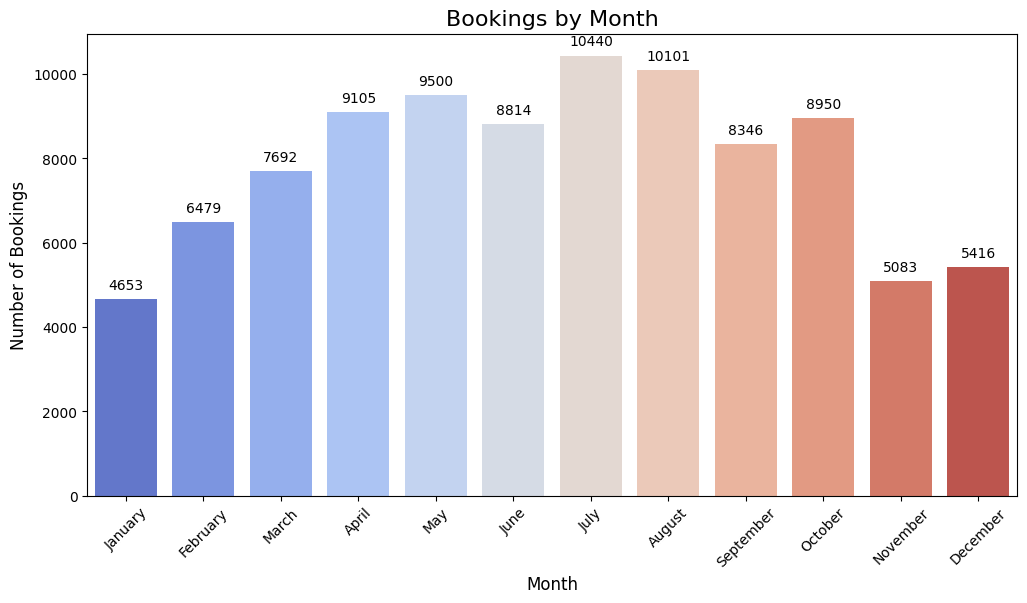

In [ ]:
monthly_counts = df['arrival_date_month'].value_counts().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'])
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=monthly_counts.index, y=monthly_counts.values, palette='coolwarm')  # Store the axis object
plt.title('Bookings by Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Bookings', fontsize=12)
plt.xticks(rotation=45)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

plt.show()


#**Distribution of Bookings by Day of the Week**

<ipython-input-99-821ae12dc7f8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=day_counts.index, y=day_counts.values, palette='Blues_d')  # Store the axis object


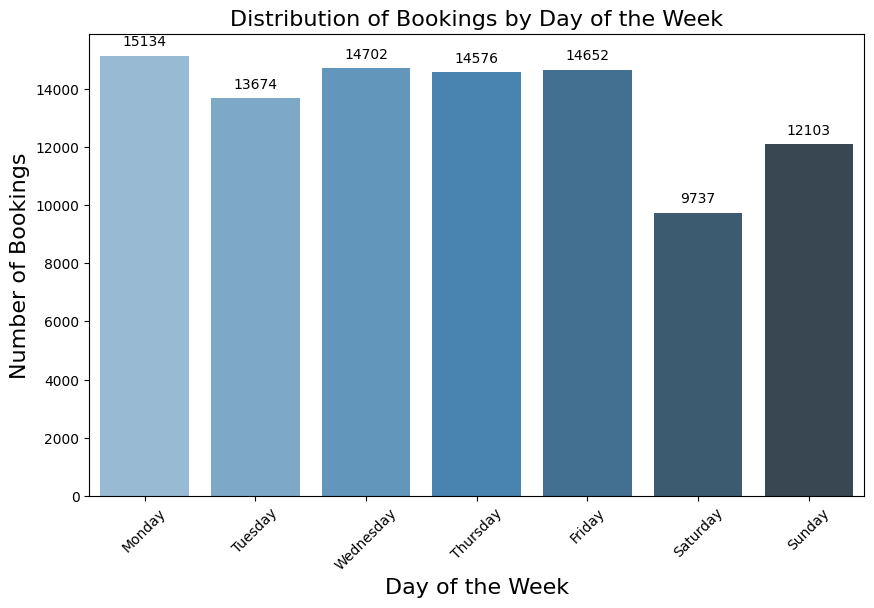

In [ ]:
day_counts = df['day_of_week'].value_counts().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=day_counts.index, y=day_counts.values, palette='Blues_d')  # Store the axis object
plt.title('Distribution of Bookings by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=16)
plt.ylabel('Number of Bookings', fontsize=16)
plt.xticks(rotation=45)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

plt.show()



#**Lead time distribution by hotel type**

<ipython-input-100-655265bc85f0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='hotel', y='lead_time', palette='Set2')


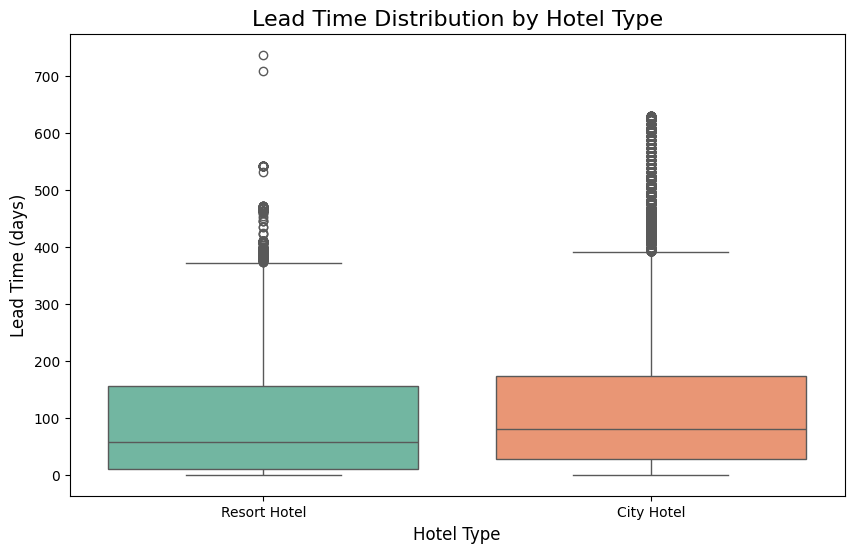

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='hotel', y='lead_time', palette='Set2')
plt.title('Lead Time Distribution by Hotel Type', fontsize=16)
plt.xlabel('Hotel Type', fontsize=12)
plt.ylabel('Lead Time (days)', fontsize=12)
plt.show()


#**Cancellation Rate by Month**

<ipython-input-101-3f34c2ee8b4f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=monthly_cancellations.index, y=monthly_cancellations.values, palette='coolwarm') # Store the axis object


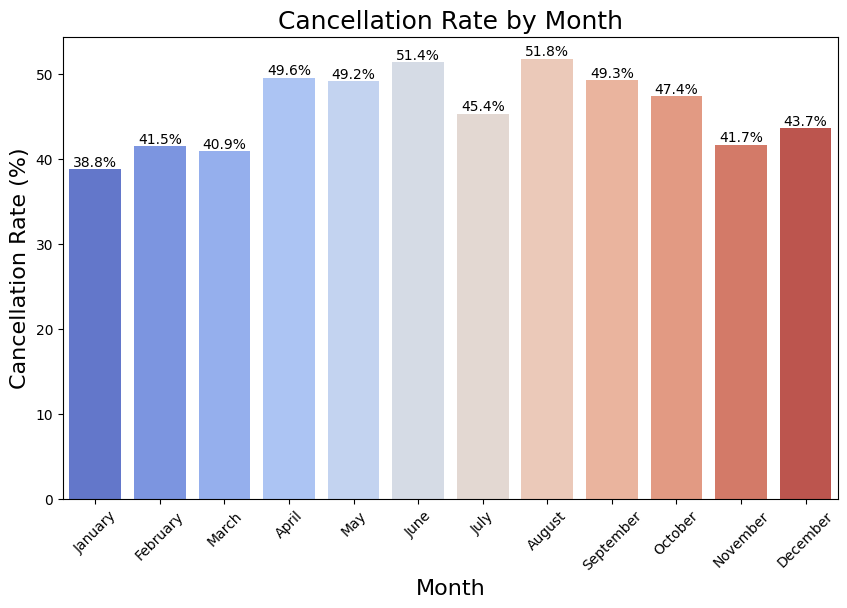

In [ ]:
monthly_cancellations = df.groupby('arrival_date_month')['is_canceled'].mean().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December']) * 100
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=monthly_cancellations.index, y=monthly_cancellations.values, palette='coolwarm') # Store the axis object
plt.title('Cancellation Rate by Month', fontsize=18)
plt.xlabel('Month', fontsize=16)
plt.ylabel('Cancellation Rate (%)', fontsize=16)
plt.xticks(rotation=45)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(),
            f'{p.get_height():.1f}%',
            ha='center', va='bottom')

plt.show()

#**Cancellation Rate by Lead Time**

<ipython-input-102-a8e311cebc18>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lead_time_cancellation = df.groupby('lead_time_bin')['is_canceled'].mean() * 100
<ipython-input-102-a8e311cebc18>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=lead_time_cancellation.index, y=lead_time_cancellation.values, palette='Blues_d')


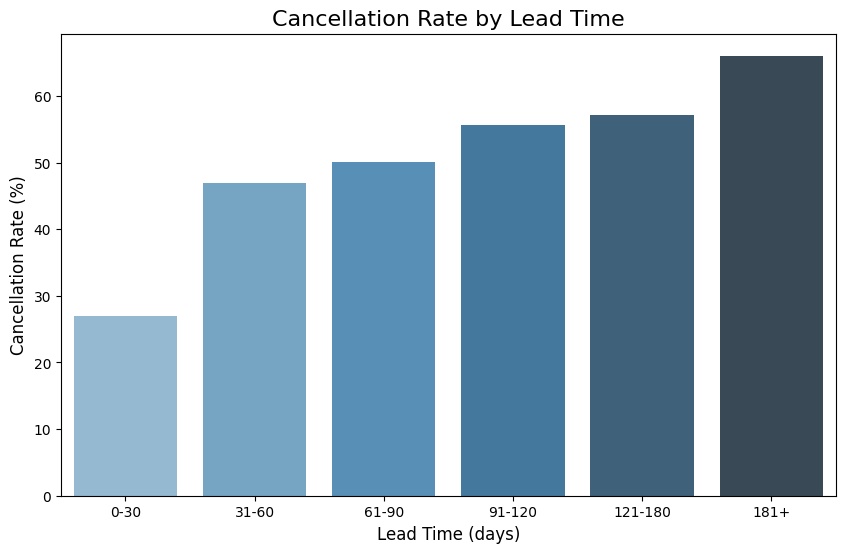

In [ ]:
df['lead_time_bin'] = pd.cut(df['lead_time'], bins=[0, 30, 60, 90, 120, 180, 365],
                               labels=['0-30', '31-60', '61-90', '91-120', '121-180', '181+'])
lead_time_cancellation = df.groupby('lead_time_bin')['is_canceled'].mean() * 100

plt.figure(figsize=(10, 6))
sns.barplot(x=lead_time_cancellation.index, y=lead_time_cancellation.values, palette='Blues_d')
plt.title('Cancellation Rate by Lead Time', fontsize=16)
plt.xlabel('Lead Time (days)', fontsize=12)
plt.ylabel('Cancellation Rate (%)', fontsize=12)
plt.show()

#**Cancellation rate by repeated Guest Status**

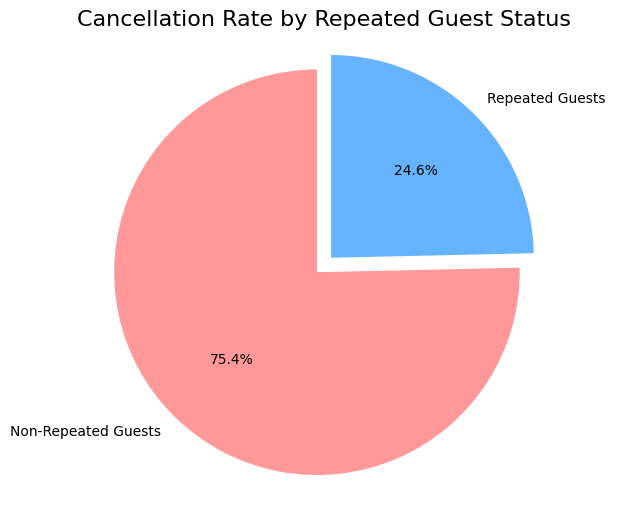

In [ ]:
import matplotlib.pyplot as plt
repeated_guest_cancellation = df.groupby('is_repeated_guest')['is_canceled'].mean() * 100
non_repeated_cancellation_rate = repeated_guest_cancellation[0]
repeated_cancellation_rate = repeated_guest_cancellation[1]
labels = ['Non-Repeated Guests', 'Repeated Guests']
sizes = [non_repeated_cancellation_rate, repeated_cancellation_rate]
colors = ['#ff9999', '#66b3ff']
explode = (0.1, 0)
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, explode=explode)
plt.title('Cancellation Rate by Repeated Guest Status', fontsize=16)
plt.axis('equal')
plt.show()

#**Top 10 Countries of Origin for Guests**

<ipython-input-104-953d966ccf4c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis') # Store the axis object


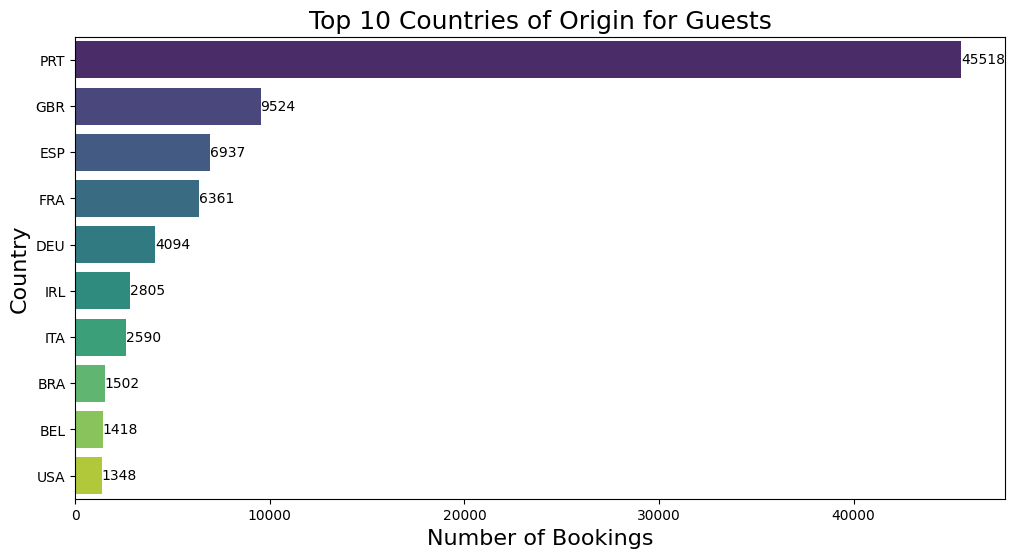

In [ ]:
top_countries = df['country'].value_counts().head(10)
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis') # Store the axis object
plt.title('Top 10 Countries of Origin for Guests', fontsize=18)
plt.xlabel('Number of Bookings', fontsize=16)
plt.ylabel('Country', fontsize=16)
for p in ax.patches:
    ax.text(p.get_width(), p.get_y() + p.get_height() / 2,
            '{:.0f}'.format(p.get_width()),
            ha='left', va='center')

plt.show()


#**Number of Adults,Children,Babies per Booking by Hotel Type**

<ipython-input-105-d3a9b0c48951>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='hotel', y='adults', palette='Set2')


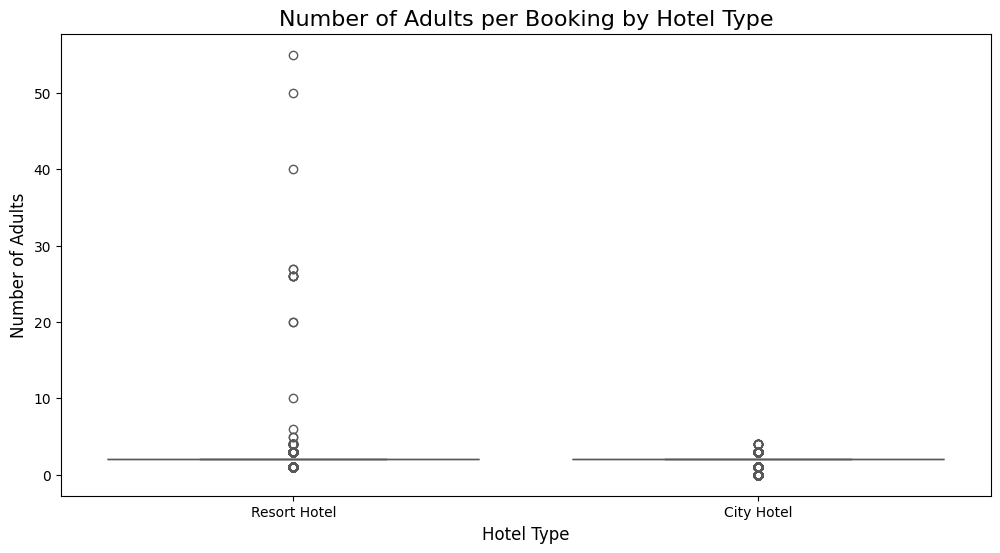

<ipython-input-105-d3a9b0c48951>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='hotel', y='children', palette='coolwarm')


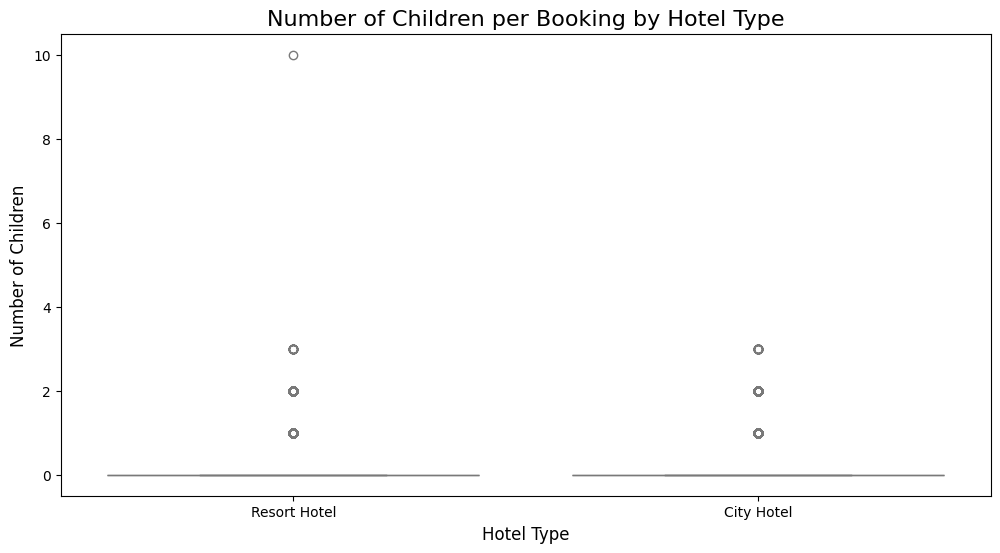

<ipython-input-105-d3a9b0c48951>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='hotel', y='babies', palette='Blues')


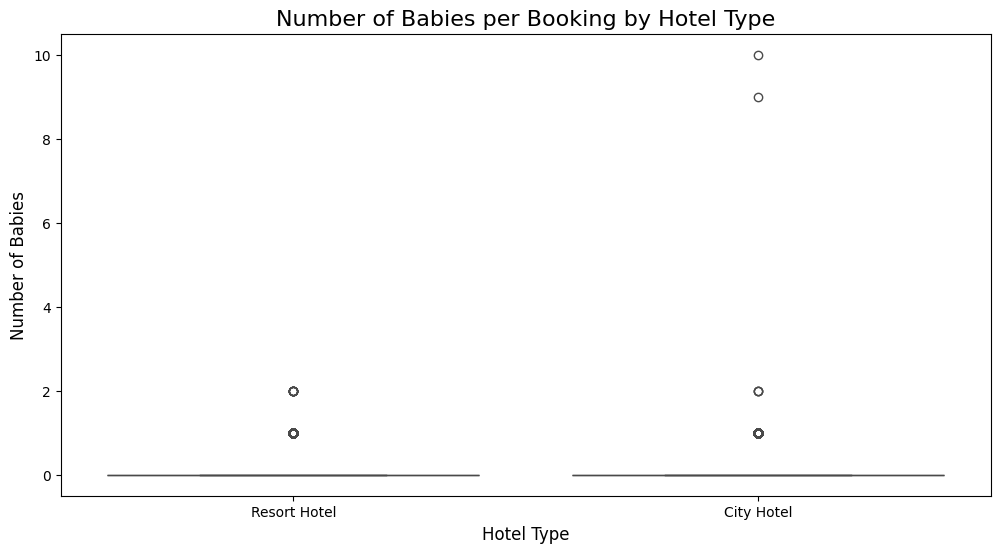

In [ ]:

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='hotel', y='adults', palette='Set2')
plt.title('Number of Adults per Booking by Hotel Type', fontsize=16)
plt.xlabel('Hotel Type', fontsize=12)
plt.ylabel('Number of Adults', fontsize=12)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='hotel', y='children', palette='coolwarm')
plt.title('Number of Children per Booking by Hotel Type', fontsize=16)
plt.xlabel('Hotel Type', fontsize=12)
plt.ylabel('Number of Children', fontsize=12)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='hotel', y='babies', palette='Blues')
plt.title('Number of Babies per Booking by Hotel Type', fontsize=16)
plt.xlabel('Hotel Type', fontsize=12)
plt.ylabel('Number of Babies', fontsize=12)
plt.show()


#**Proportion of Stays: Weekends vs Weekdays**

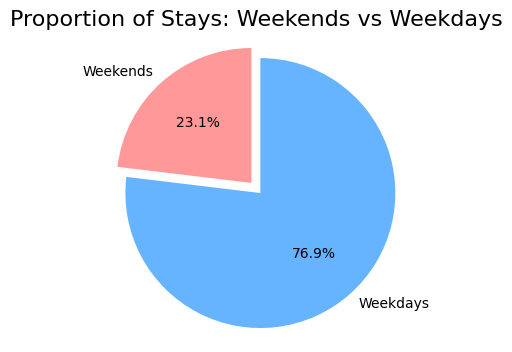

In [ ]:
weekend_stays_count = df[df['day_of_week'].isin(['Saturday', 'Sunday'])]['hotel'].count()
weekday_stays_count = df[df['day_of_week'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]['hotel'].count()
labels = ['Weekends', 'Weekdays']
sizes = [weekend_stays_count, weekday_stays_count]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)
plt.figure(figsize=(6, 4))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, explode=explode)
plt.title('Proportion of Stays: Weekends vs Weekdays', fontsize=16)
plt.axis('equal')
plt.show()


#**Reserved Room Types**

<ipython-input-107-f8a874a51ecc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=reserved_rooms.index, y=reserved_rooms.values, palette='viridis') # Store the axis object


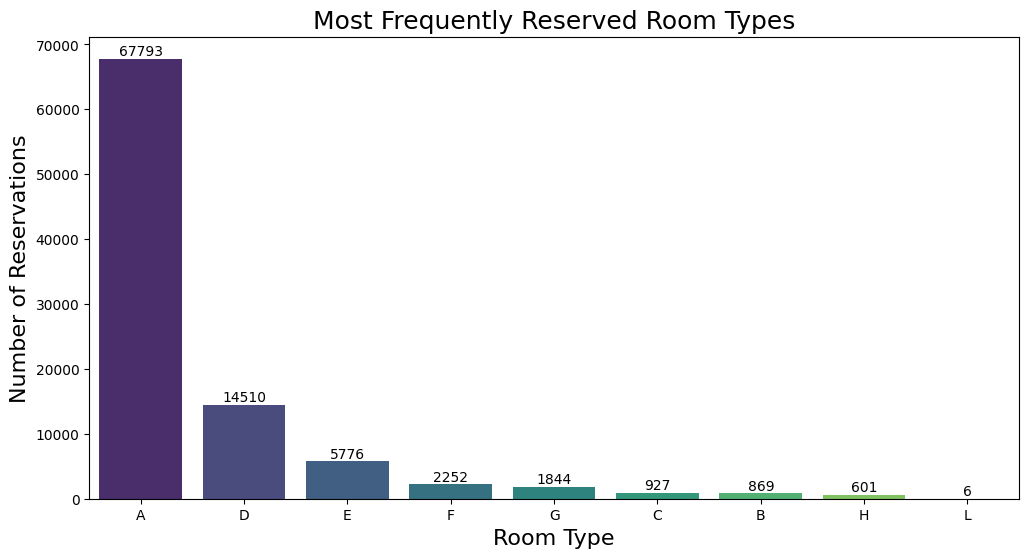

In [ ]:

reserved_rooms = df['reserved_room_type'].value_counts()
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=reserved_rooms.index, y=reserved_rooms.values, palette='viridis') # Store the axis object
plt.title('Most Frequently Reserved Room Types', fontsize=18)
plt.xlabel('Room Type', fontsize=16)
plt.ylabel('Number of Reservations', fontsize=16)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, p.get_height(),
            '{:.0f}'.format(p.get_height()),
            ha='center', va='bottom')

plt.show()


#**Match vs Mismatch Between Reserved and Assigned Room Types**

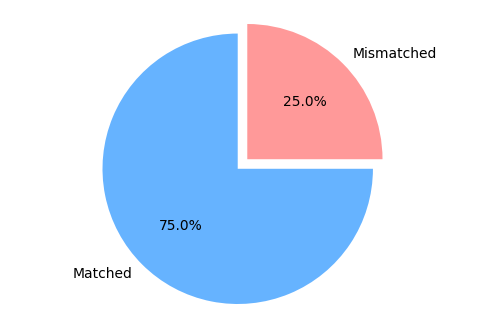

In [ ]:
mismatch_rate = 25
labels = ['Matched', 'Mismatched']
sizes = [100 - mismatch_rate, mismatch_rate]
colors = ['#66b3ff', '#ff9999']
explode = (0.1, 0)
plt.figure(figsize=(6, 4))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, explode=explode)
plt.axis('equal')
plt.show()


#**Distribution of ADR (Average Daily Rate)**

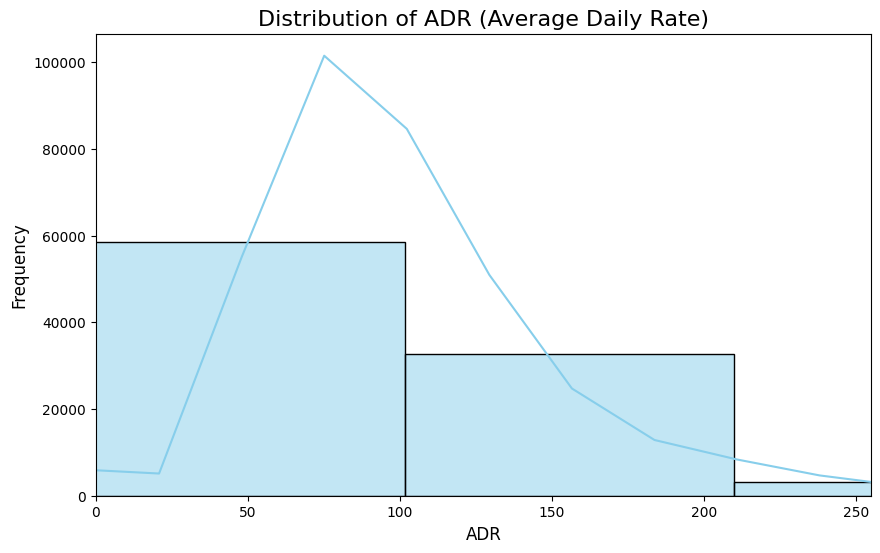

In [ ]:
# Distribution of ADR
plt.figure(figsize=(10, 6))
sns.histplot(df['adr'], kde=True, bins=50, color='skyblue')
plt.title('Distribution of ADR (Average Daily Rate)', fontsize=16)
plt.xlabel('ADR', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xlim(0, df['adr'].quantile(0.99))
plt.show()


#**Average Daily Rate by room type**

<ipython-input-110-864e6b049fd2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=adr_avg_by_room, x='reserved_room_type', y='average', palette='Set3')


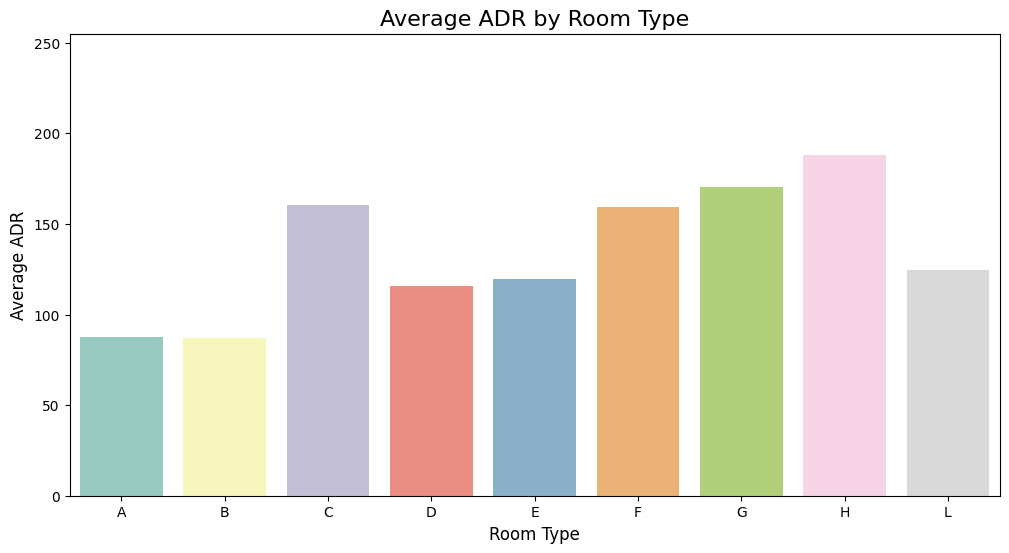

In [ ]:
adr_avg_by_room = df.groupby('reserved_room_type')['adr'].mean().reset_index()
adr_avg_by_room.rename(columns={'adr': 'average'}, inplace=True)
plt.figure(figsize=(12, 6))
sns.barplot(data=adr_avg_by_room, x='reserved_room_type', y='average', palette='Set3')
plt.title('Average ADR by Room Type', fontsize=16)
plt.xlabel('Room Type', fontsize=12)
plt.ylabel('Average ADR', fontsize=12)
plt.ylim(0, df['adr'].quantile(0.99))
plt.show()


#**Meal Plans by Guest Type**

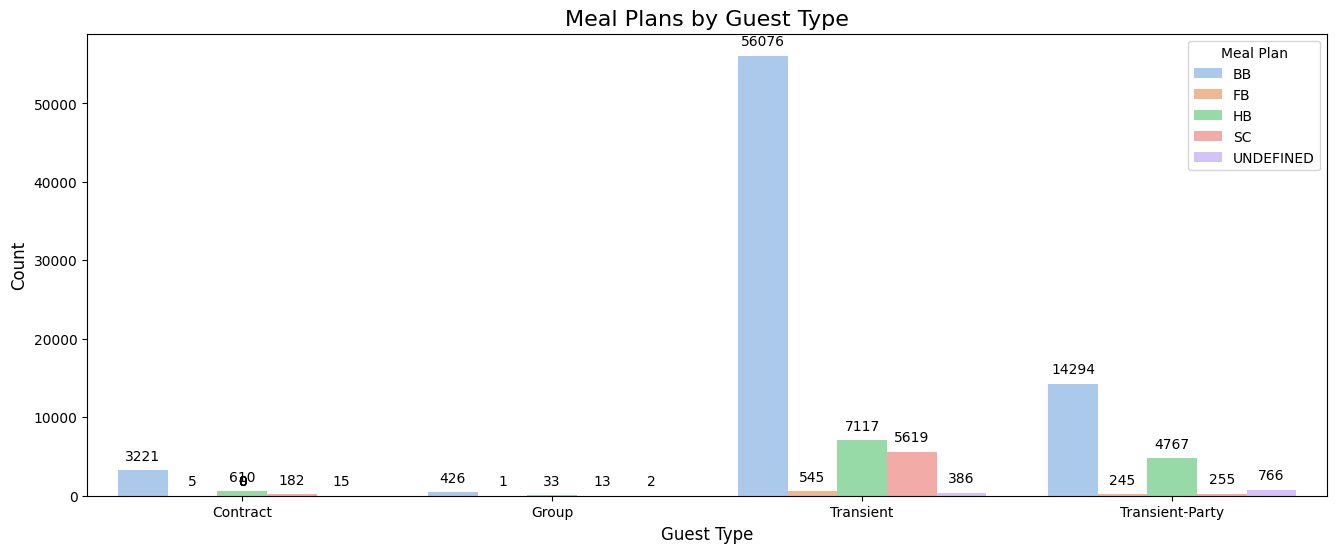

In [ ]:
meal_guest_type = df.groupby(['customer_type', 'meal']).size().reset_index(name='count')
plt.figure(figsize=(16, 6))
ax = sns.barplot(data=meal_guest_type, x='customer_type', y='count', hue='meal', palette='pastel')
plt.title('Meal Plans by Guest Type', fontsize=16)
plt.xlabel('Guest Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Meal Plan')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

plt.show()

#**Meal Plans by Hotel**

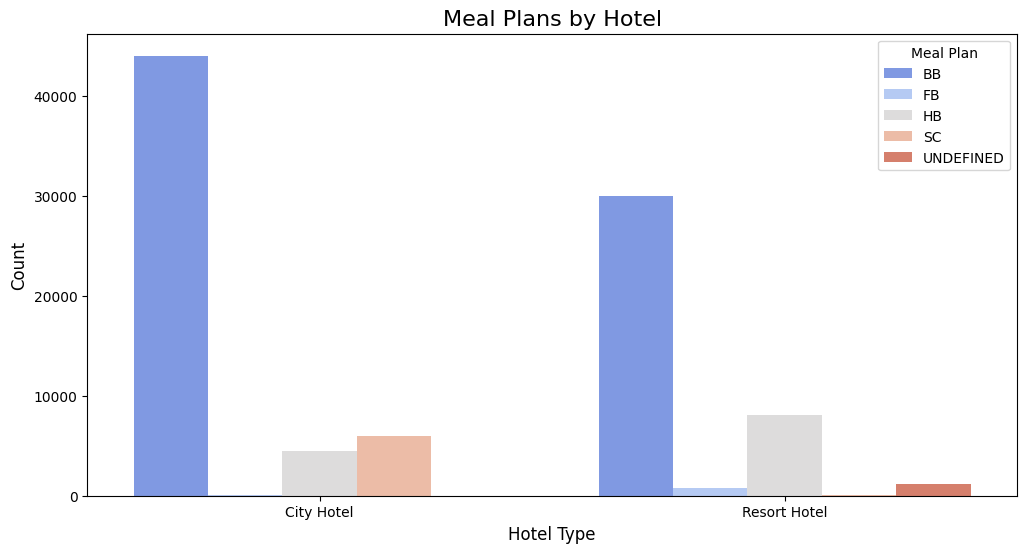

In [ ]:
# Group by hotel and meal plans
meal_hotel = df.groupby(['hotel', 'meal']).size().reset_index(name='count')

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(data=meal_hotel, x='hotel', y='count', hue='meal', palette='coolwarm')
plt.title('Meal Plans by Hotel', fontsize=16)
plt.xlabel('Hotel Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Meal Plan')
plt.show()

#**Booking By New  and Repeated Guest**

Proportion of bookings by repeated guests: 3.58%


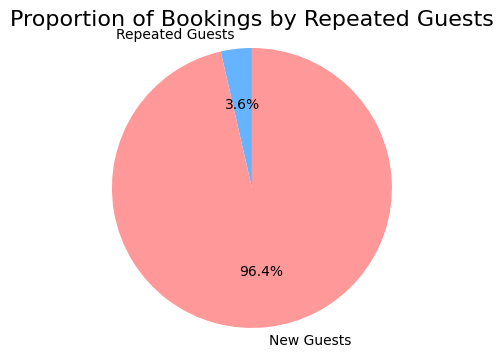

In [ ]:
total_bookings = len(df)
repeated_guest_bookings = df[df['is_repeated_guest'] == 1].shape[0]
repeated_guest_proportion = (repeated_guest_bookings / total_bookings) * 100
print(f"Proportion of bookings by repeated guests: {repeated_guest_proportion:.2f}%")
labels = ['Repeated Guests', 'New Guests']
sizes = [repeated_guest_bookings, total_bookings - repeated_guest_bookings]
colors = ['#66b3ff', '#ff9999']
plt.figure(figsize=(6, 4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Proportion of Bookings by Repeated Guests', fontsize=16)
plt.axis('equal')
plt.show()


#**Total Parking Requests by Hotel Type**

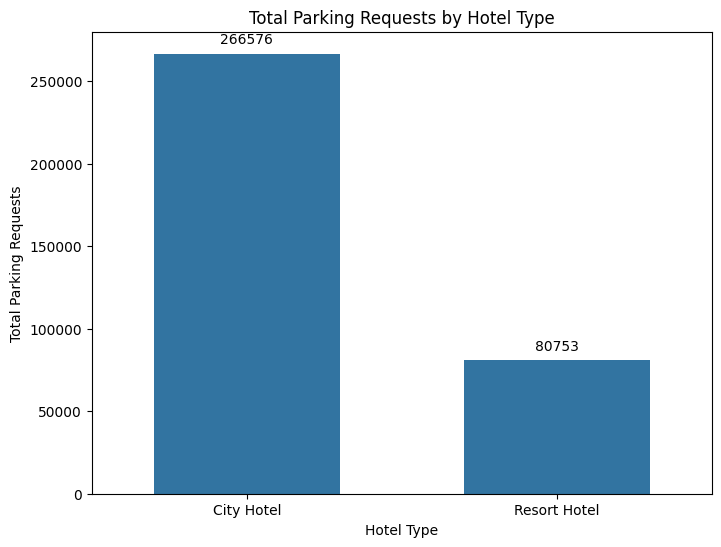

In [ ]:
df['parking_requests'] = np.random.randint(0, 5, size=len(df))
parking_by_hotel = df.groupby('hotel')['parking_requests'].sum()
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=parking_by_hotel.index, y=parking_by_hotel.values, width=0.6)  # Store the axis object
plt.title('Total Parking Requests by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Total Parking Requests')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')

plt.show()